In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog
!unzip -q leapgestrecog.zip

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.12G/2.13G [00:24<00:00, 87.3MB/s]
100% 2.13G/2.13G [00:25<00:00, 91.3MB/s]


In [ ]:
import os
from pathlib import Path
data=Path("leapGestRecog")
IMG_SIZE = 128
RANDOM_STATE = 42

In [ ]:
data.is_dir

<bound method Path.is_dir of PosixPath('leapGestRecog')>

In [ ]:
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    # mv-move
    !rm -rf pytorch-deep-learning
    # rm-remove rf-flags r=Recursively remove,f=force removal without asking.
    from going_modular.going_modular import data_setup, engine


[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4183, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 4183 (delta 64), reused 108 (delta 42), pack-reused 4035 (from 1)
Receiving objects: 100% (4183/4183), 652.89 MiB | 24.19 MiB/s, done.
Resolving deltas: 100% (2435/2435), done.
Updating files: 100% (248/248), done.


In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision import models
from torch.utils.data import DataLoader, ConcatDataset
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from torchvision.utils import make_grid
from torchsummary import summary
import matplotlib.pyplot as plt
%matplotlib inline
import time
from torch.autograd import Variable
import cv2
from PIL import Image

from pathlib import Path

In [ ]:
Da=ImageFolder(data/'00')
class_names=Da.classes #returns class name

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the original dataset
dataset_dir =

# Paths where you want to save the train and test datasets
train_dir = 'path/to/train'
test_dir = 'path/to/test'

# Create directories for train and test datasets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through each class in the dataset
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # List all images in the current class directory
    images = os.listdir(class_path)

    # Split the images into training and testing sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create directories for the current class in train and test directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Move training images to the train directory
    for image in train_images:
        shutil.move(os.path.join(class_path, image), os.path.join(train_dir, class_name, image))

    # Move testing images to the test directory
    for image in test_images:
        shutil.move(os.path.join(class_path, image), os.path.join(test_dir, class_name, image))

print("Dataset successfully split into training and testing sets!")


In [ ]:
# @title Lets create training and testing set
train_set_transform=transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=3),#cc,l,w
        transforms.Resize((IMG_SIZE,IMG_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
    ]
)
test_set_transform=transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=3),
        transforms.Resize((IMG_SIZE,IMG_SIZE)),
        transforms.ToTensor(),
    ]
)

In [ ]:
train_set_list=[]
test_set_list=[]
for dir in os.listdir(data):
  train=ImageFolder(os.path.join(data,dir),train_set_transform)
  test=ImageFolder(os.path.join(data,dir),test_set_transform)
  train_set_list.append(train)
  test_set_list.append(test)
train_set=ConcatDataset(train_set_list)
test_set=ConcatDataset(test_set_list)

In [ ]:
#spliting the traning and testing set
train_len=len(train_set)
test_len=len(test_set)


In [ ]:
import os
os.listdir(data)

['05', '06', '09', '08', '01', '07', '03', '04', '00', '02']

In [ ]:
def digits_2_class(x):
  for idx,i in enumerate(class_names):
    if x==idx:
      return i

In [ ]:
from collections import Counter
train_counts = Counter([label for _, label in train_set])
print(train_counts)

Counter({0: 2000, 1: 2000, 2: 2000, 3: 2000, 4: 2000, 5: 2000, 6: 2000, 7: 2000, 8: 2000, 9: 2000})


In [ ]:
torch.manual_seed(42)
test_split=0.2
split=int(len(train_set)*test_split)
indices=torch.randperm(len(train_set))#returns the random permutation
train_set = torch.utils.data.Subset(train_set, indices[split:])
test_set = torch.utils.data.Subset(test_set, indices[:split])
print(f"The Length of Training set is {len(train_set)}")
print(f"The Length of Testing set is {len(test_set)}")

The Length of Training set is 16000
The Length of Testing set is 4000


In [ ]:
train_set[6000][0].size()

torch.Size([3, 128, 128])

In [ ]:
batch_size=42
train_dataloader=DataLoader(train_set,batch_size=batch_size,shuffle=True )
test_dataloader=DataLoader(test_set,batch_size=batch_size,shuffle=False)
train_dataloader


torch.Size([3, 128, 128])
tensor(6) 07_ok


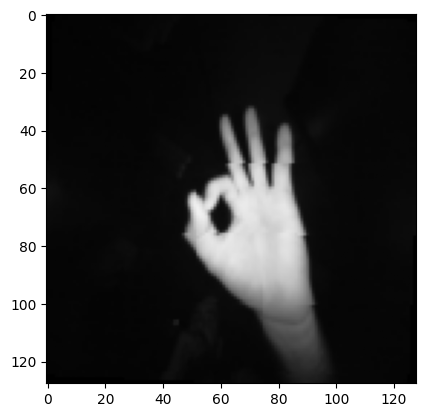

In [ ]:
#random image
for img,l in train_dataloader: #IMAGE,LABEL
  print(img[0].shape)
  print(l[0],digits_2_class(l[0]))
  plt.imshow(img[0].permute(1,2,0))
  break

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#lets take the pretrained weight
model = models.resnet50(pretrained=True).to(device)
in_features = model.fc.in_features
fc = nn.Linear(in_features=in_features, out_features=len(CLASSES_NAME))
model.fc = fc
summary(model.to(device), input_size=(3, 128, 128))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 138MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]           4,096
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
           Conv2d-11          [-1, 256, 32, 32]          16,384
      BatchNorm2d-12          [-1, 256, 32, 32]             512
           Conv2d-13          [-1, 256, 32, 32]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
for param in model.parameters():
    param.requires_grad = True

In [ ]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
from timeit import default_timer as timer
start_timer=timer()
results=engine.train(model=model,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=5,
                     device=device)
end_timer=timer()
print(f"Total training time: {end_timer-start_timer:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2482 | train_acc: 0.9367 | test_loss: 0.0178 | test_acc: 0.9928
Epoch: 2 | train_loss: 0.0490 | train_acc: 0.9867 | test_loss: 0.0362 | test_acc: 0.9888
Epoch: 3 | train_loss: 0.0502 | train_acc: 0.9852 | test_loss: 0.0571 | test_acc: 0.9819
Epoch: 4 | train_loss: 0.0446 | train_acc: 0.9884 | test_loss: 0.0123 | test_acc: 0.9973
Epoch: 5 | train_loss: 0.0286 | train_acc: 0.9929 | test_loss: 0.0126 | test_acc: 0.9960
Total training time: 688.986 seconds


In [ ]:
try:
  from helper_functions import plot_loss_curves
except:
  print("[INFO] Can't find helper_functions.py, downloading...")
  with open("helper_functions.py","wb") as f:
    import requests
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    f.write(request.content)
  from helper_functions import plot_loss_curves

[INFO] Can't find helper_functions.py, downloading...


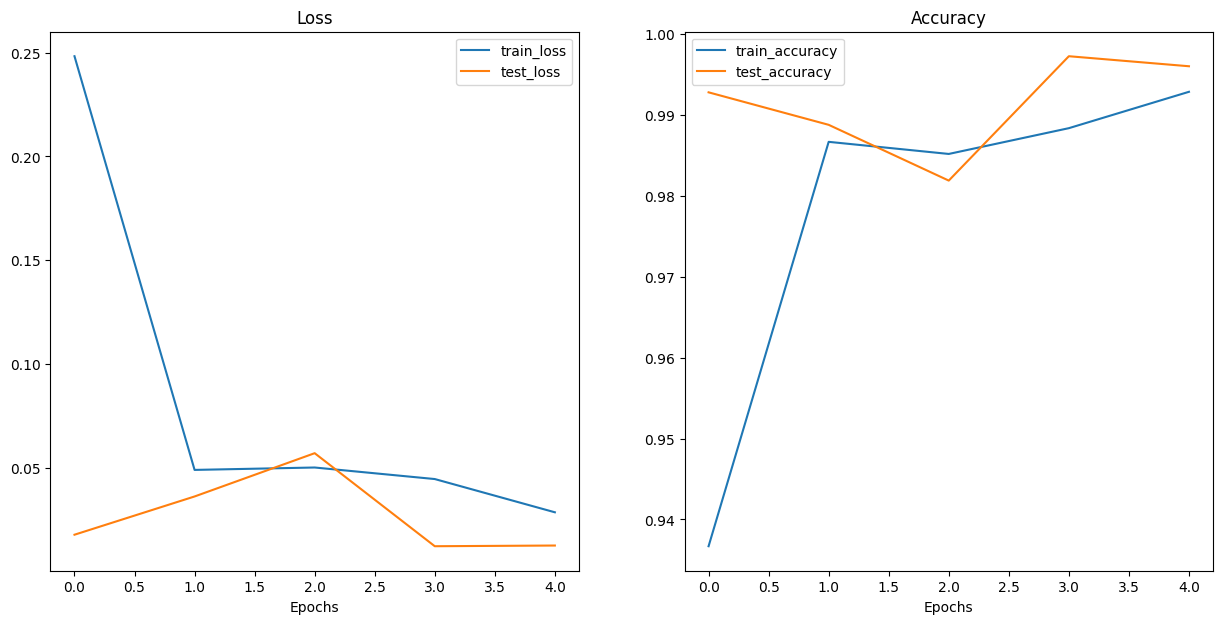

In [ ]:
plot_loss_curves(results)

# saving and loading of model


In [ ]:
torch.save(model, 'my_model')


In [ ]:
model = torch.load('my_model')
model.eval()

<ipython-input-26-a872a3d34cac>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('my_model')


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

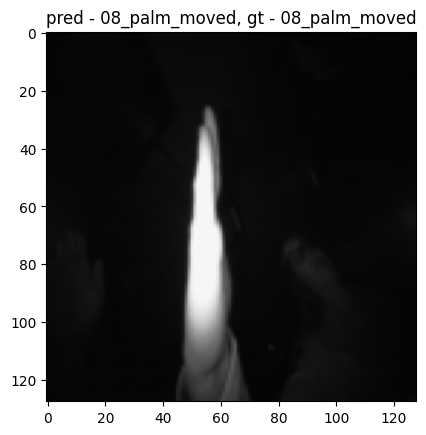

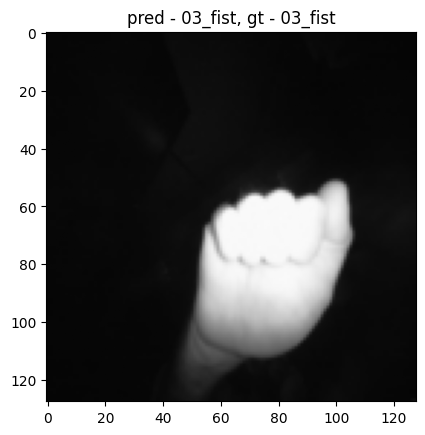

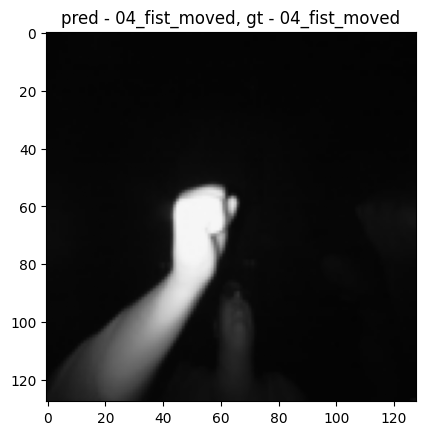

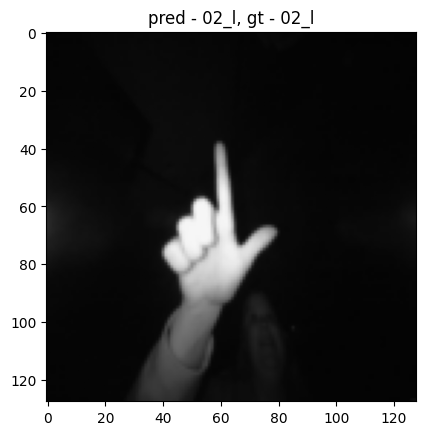

In [ ]:
with torch.no_grad():
    for i, data in enumerate(test_dataloader, 3):
        images, labels = data[0].to(device), data[1].to(device)

        outputs = model(images)
        plt.title(f'pred - {digits_2_class(outputs[0].argmax())}, gt - {digits_2_class(labels[0])}')
        plt.imshow(images[0].cpu().permute(1, 2, 0), cmap='gray')
        plt.show()
        if i>5:
            break